# Exc1 - Chapter2

Try a support vector machine regressor ```(sklearn.svm.SVR)``` with various1.
hyperparameters, such as ```kernel="linear"``` (with various values for the
C hyperparameter) or ```kernel="rbf```  (with various values for the ```C``` and ```gamma```
hyperparameters). Note that support vector machines don’t scale well to large
datasets, so you should probably train your model on just the first 5,000 instances
of the training set and use only **3-fold cross-validation**, or else it will take hours.
Don’t worry about what the hyperparameters mean for now; we’ll discuss them
in Chapter 5. How does the best SVR predictor perform?

In [2]:
import sklearn.datasets   # Database

In [3]:
housing = sklearn.datasets.fetch_california_housing(as_frame=True)
# print( housing.DESCR)

#california_housing_dataset:
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297


In [4]:
import numpy as np
print(" target shape = ", np.shape(housing.target))
print("   data shape = "  , np.shape(housing.data))
print( housing.keys())

 target shape =  (20640,)
   data shape =  (20640, 8)
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

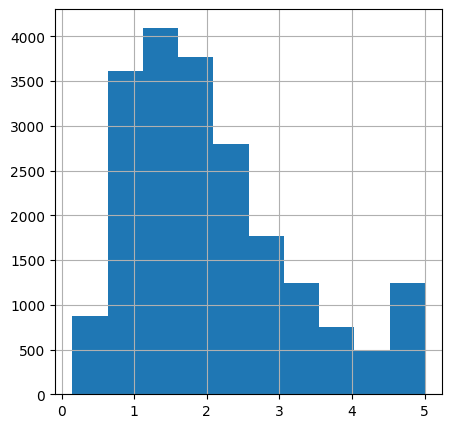

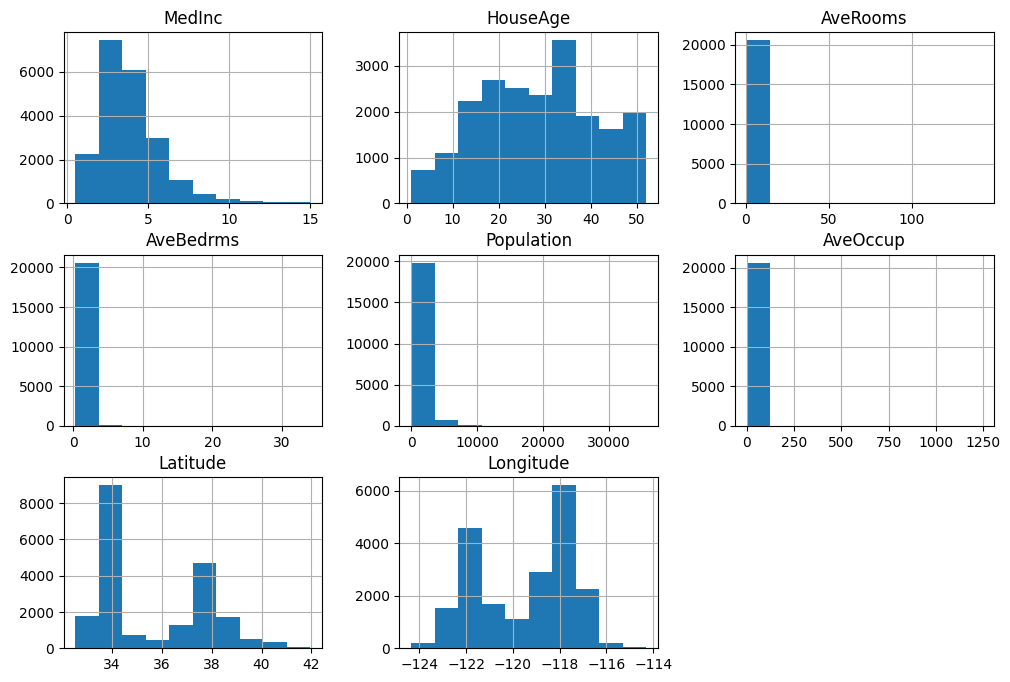

In [5]:
housing['target'].hist(figsize=(5,5))
housing['data'].hist(figsize=(12,8))

In [6]:
housing.data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [7]:
print(housing.target.head(5))

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


### Creating Test & Train sets

In [8]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(
                                                           housing.data,
                                                           housing.target,
                                                           test_size=0.2,
                                                           random_state=42)

print( "training-set's featurs size: ", np.shape(train_features))
print( "training-set's target  size: ", np.shape(train_target  ))
print( "    test-set's featurs size: ", np.shape( test_features))
print( "    test-set's  target size: ", np.shape( test_target  ))


training-set's featurs size:  (16512, 8)
training-set's target  size:  (16512,)
    test-set's featurs size:  (4128, 8)
    test-set's  target size:  (4128,)


### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

train_features_scaled = std_scaler.fit_transform(train_features)
test_features_scaled  = std_scaler.transform(     test_features)

print(train_features_scaled.shape)
print(train_target.shape)

(16512, 8)
(16512,)


0.9999999999999998
1.0
0.9999999999999999
1.0
1.0
1.0
1.0000000000000002
1.0


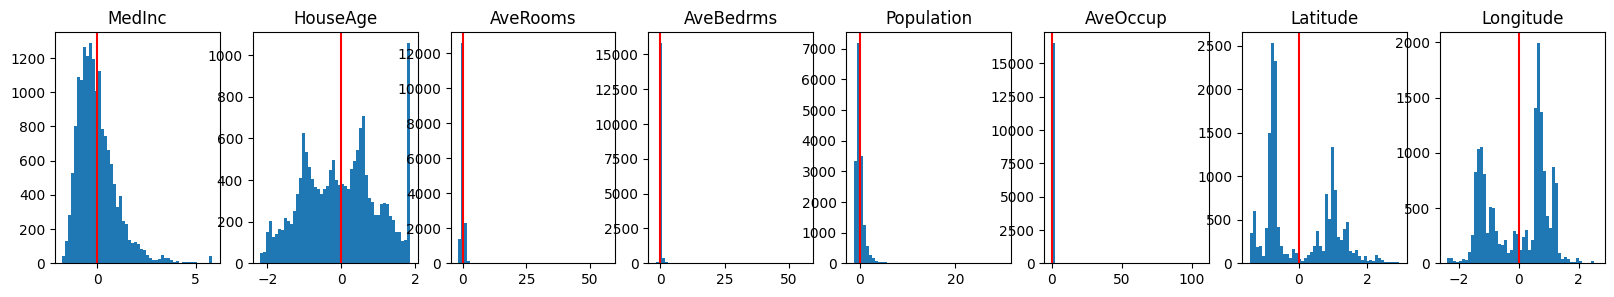

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, train_features_scaled.shape[1], figsize=(20, 3))
for idx in  range(train_features_scaled.shape[1]):
    axs[idx].hist(train_features_scaled[:, idx], bins=50)
    axs[idx].set_title(housing.feature_names[idx])
    axs[idx].axvline(train_features_scaled[:, idx].mean(), color='red')
    print(train_features_scaled[:, idx].std())
plt.show()

### Training SVM with linear kernel

In [10]:
from sklearn.svm import SVR

housing_svr = SVR(kernel="linear", C=0.1, epsilon=0.1)
housing_svr.fit(train_features_scaled, train_target)

SVR(C=0.1, kernel='linear')

In [ ]:
housing

### Grid search for linear kernel
to make the code easier to understand as an exercise, I broke the following cell into smaller steps

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline
from sklearn.svm             import SVR

parameters = [
              { 'kernel':('linear')       ,
                    'C' : [0.1, 1.0, 10.0],
               'epsilon': [0.1, 1.0, 10.0]},

              { 'kernel':('rbf')          ,
                    'C' : [0.1, 1.0, 10.0],
               'epsilon': [0.1, 1.0, 10.0],
                 'gamma': [0.1, 1.0]      }
]
housing_svr = SVR()

clf = GridSearchCV(housing_svr, parameters)
grid_search_SVR = GridSearchCV(housing_svr,
                               parameters ,
                               cv=3       ,
                               scoring='neg_root_mean_squared_error')

grid_search_SVR.fit(train_features_scaled[::4], train_target[::4])

KeyboardInterrupt: 

In [19]:
# Breaking the gridsearch into smaller steps

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline
from sklearn.svm             import SVR

parameters = [{ 'C' : [0.1, 1.0, 10.0], 'epsilon':[0.05, 0.1, 1.0]}]
housing_svr     = SVR(kernel="linear")
grid_search_SVR = GridSearchCV(housing_svr,parameters ,cv=3 ,
                               scoring='neg_root_mean_squared_error')

grid_search_SVR.fit(train_features_scaled[::4], train_target[::4])

GridSearchCV(cv=3, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [0.1, 1.0, 10.0], 'epsilon': [0.05, 0.1, 1.0]}],
             scoring='neg_root_mean_squared_error')

In [26]:
print(abs(grid_search_SVR.best_score_))
print(grid_search_SVR.best_params_)

0.7245021503224919
{'C': 1.0, 'epsilon': 0.1}


In [44]:
# %%timeit
parameters = [
              { 'kernel': ['rbf']          ,
                    'C' : [0.1, 1.0, 10.0, 100],
               'epsilon': [0.1, 1.0, 10.0],
                 'gamma': [0.1, 1.0]      }
              ]
housing_svr     = SVR()
grid_search_SVR_rbf = GridSearchCV(housing_svr,parameters ,cv=3 ,
                               scoring='neg_root_mean_squared_error')

grid_search_SVR_rbf.fit(train_features_scaled[::4], train_target[::4])


GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [0.1, 1.0, 10.0, 100],
                          'epsilon': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0],
                          'kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [45]:
print("best scores: ", abs(grid_search_SVR_rbf.best_score_))
print("the best set of params: ", grid_search_SVR_rbf.best_params_)

best scores:  0.616338037219094
the best set of params:  {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


# Exc2:  Using randomized search for housing data
Try replacing the ```GridSearchCV``` with a ```RandomizedSearchCV```

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats             import randint

housing_svr    = SVR()
param_distribs = {'kernel':('linear', 'rbf'),
                  'C': randint(low=3, high=50),
                  'gamma': randint(low=2, high=20)}

rnd_search     = RandomizedSearchCV(housing_svr,
                                param_distributions=param_distribs,
                                n_iter=10, cv=3,
                                scoring='neg_root_mean_squared_error',
                                random_state=42)
rnd_search.fit(train_features_scaled[:5000], train_target[:5000])


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bfdcd0b5330>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bfdcd0b53f0>,
                                        'kernel': ('linear', 'rbf')},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [51]:
print(abs(rnd_search.best_score_))
print(rnd_search.best_params_)

0.746446903363417
{'C': 23, 'gamma': 2, 'kernel': 'rbf'}


# Exc3: SelectFromModel
Try adding a``` SelectFromModel``` transformer in the preparation pipeline to select only the most important attributes.